# Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an essential step of developing a machine learning model.  This step helps us understands the quality and characteristics of the data.  Based on the information gathered, we are able to come up with a suitable solution to tackle this specific problem.

In [1]:
import pandas as pd
from pandas_summary import DataFrameSummary
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nbutils import utils
%matplotlib inline

In [2]:
utils.df_show_all()
data_dir = "_data/"
df_train = pd.read_csv(data_dir + 'train.csv')
df_test = pd.read_csv(data_dir + 'test.csv')

In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


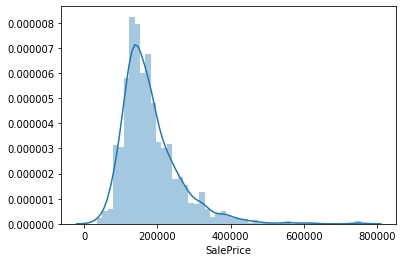

In [4]:
# Sale Price (target variable) distribution plot
sns.distplot(df_train['SalePrice']);

In [5]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Correlation using Box Plot

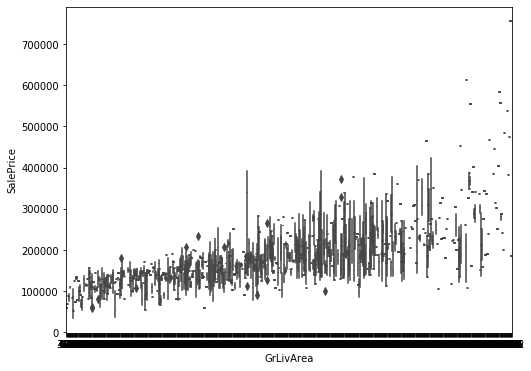

In [6]:
#  An example of using box plot to show correlation instead of scatter plot
var = 'GrLivArea'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=df_train[['SalePrice',var]])
#fig.axis(ymin=0, ymax=800000);

In [25]:
utils.show_corr_table(df_train)
head=10
target_col='SalePrice'
corr = pd.DataFrame(df_train.corr().abs().unstack())
corr = corr.reset_index()
corr.columns = ['v1', 'v2', 'c']
corr['ordered-cols'] = corr.apply(lambda x: '-'.join(sorted([x['v1'], x['v2']])), axis=1)
corr = corr.drop_duplicates(['ordered-cols'])
corr.drop(['ordered-cols'], axis=1, inplace=True)
corr = corr.query('v1 != v2').sort_values('c', ascending=False)
print(corr.head(head))

if target_col is not None:
    filter = (corr.v1 == target_col) | (corr.v2 == target_col)
    print(corr[filter].head(head))

                v1            v2         c
1015  GarageCars    GarageArea    0.882475
253   YearBuilt     GarageYrBlt   0.825667
631   GrLivArea     TotRmsAbvGrd  0.825489
469   TotalBsmtSF   1stFlrSF      0.819530
189   OverallQual   SalePrice     0.790982
645   GrLivArea     SalePrice     0.708624
548   2ndFlrSF      GrLivArea     0.687501
821   BedroomAbvGr  TotRmsAbvGrd  0.676620
359   BsmtFinSF1    BsmtFullBath  0.649212
291   YearRemodAdd  GarageYrBlt   0.642277
                v1         v2         c
189   OverallQual   SalePrice  0.790982
645   GrLivArea     SalePrice  0.708624
1025  GarageCars    SalePrice  0.640409
1063  GarageArea    SalePrice  0.623431
493   TotalBsmtSF   SalePrice  0.613581
531   1stFlrSF      SalePrice  0.605852
759   FullBath      SalePrice  0.560664
911   TotRmsAbvGrd  SalePrice  0.533723
265   YearBuilt     SalePrice  0.522897
303   YearRemodAdd  SalePrice  0.507101


### Diagonal Correlation Matrix

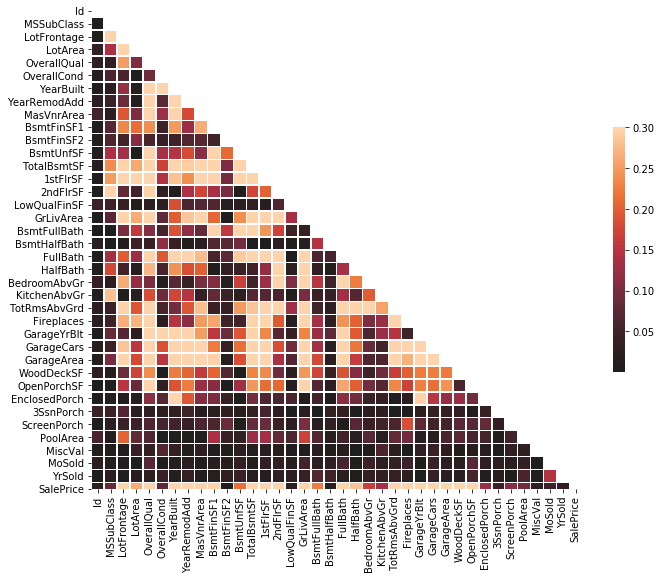

In [8]:
utils.show_corr_matrix(df_train)

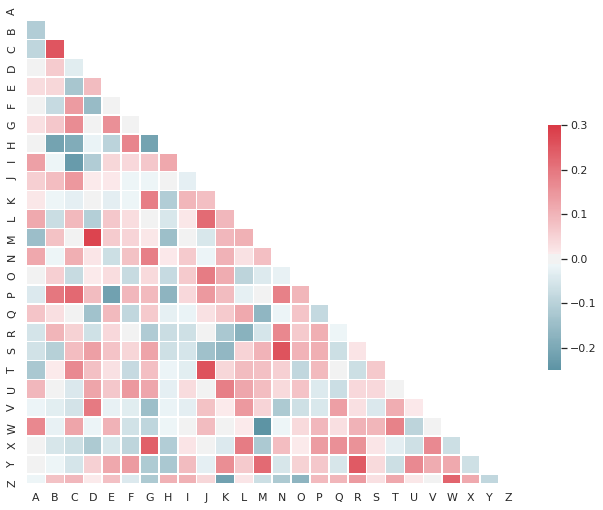

In [9]:
## Diagonal Correlation Matrix using seaborn
## Unfortunately only works with numpy <= 1.18.0 or fixed in a future release of seaborn

# from string import ascii_letters
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set(style="white")

# # Generate a large random dataset
# rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# # Compute the correlation matrix
# corr = d.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

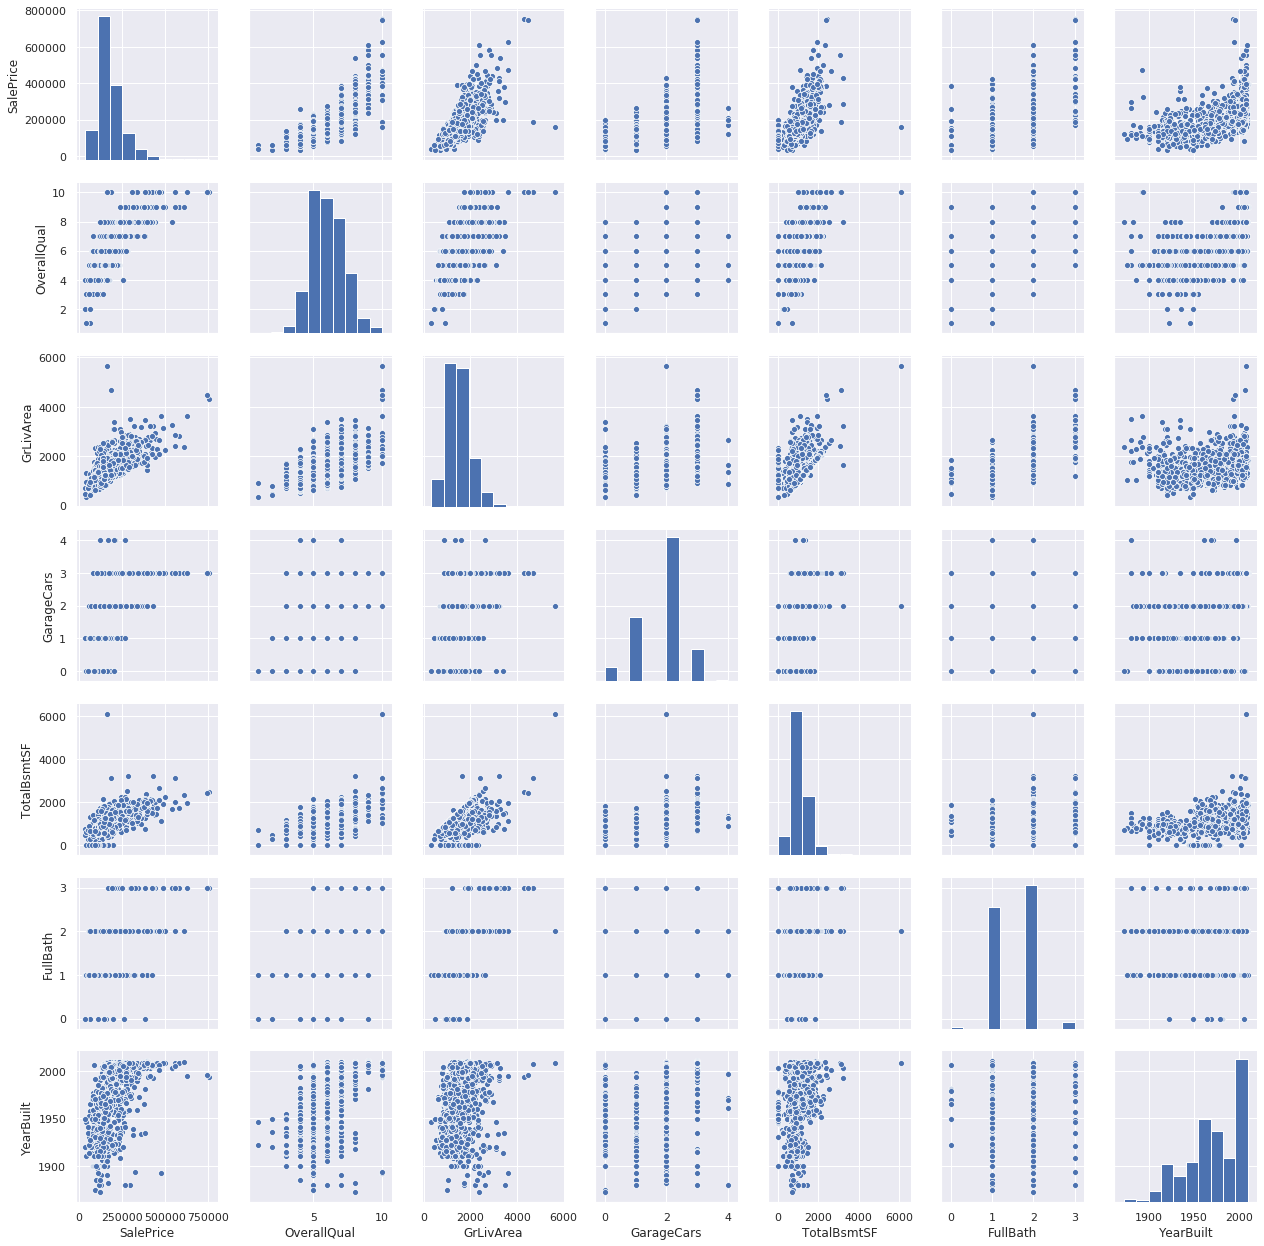

In [10]:
#Grid scatterplot
utils.show_corr_plot(df_train, cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'])
# Very strong correlation between SalePrice and OverallQual

In [15]:
# Find missing data
df_missing = utils.show_missing_cols(df_train)
df_missing.sort_values(by='missing_perc', ascending=False, axis=1)

,PoolQC,MiscFeature,Alley,Fence,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,FireplaceQu,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1,LotFrontage,MasVnrArea,MasVnrType,Electrical
counts,7,54,91,281,1379,1379,1379,1379,1379,770,1422,1422,1423,1423,1423,1201,1452,1452,1459
uniques,3,4,2,4,5,6,97,3,5,5,4,6,4,4,6,110,327,4,5
missing,1453,1406,1369,1179,81,81,81,81,81,690,38,38,37,37,37,259,8,8,1
missing_perc,99.52%,96.30%,93.77%,80.75%,5.55%,5.55%,5.55%,5.55%,5.55%,47.26%,2.60%,2.60%,2.53%,2.53%,2.53%,17.74%,0.55%,0.55%,0.07%
types,categorical,categorical,bool,categorical,categorical,categorical,numeric,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numeric,numeric,categorical,categorical


In [12]:
# Describe columns with missing values
for c in df_missing.columns:
    print(df_train[c].describe())

count    1201.000000
mean     70.049958  
std      24.284752  
min      21.000000  
25%      59.000000  
50%      69.000000  
75%      80.000000  
max      313.000000 
Name: LotFrontage, dtype: float64
count     91  
unique    2   
top       Grvl
freq      50  
Name: Alley, dtype: object
count     1452
unique    4   
top       None
freq      864 
Name: MasVnrType, dtype: object
count    1452.000000
mean     103.685262 
std      181.066207 
min      0.000000   
25%      0.000000   
50%      0.000000   
75%      166.000000 
max      1600.000000
Name: MasVnrArea, dtype: float64
count     1423
unique    4   
top       TA  
freq      649 
Name: BsmtQual, dtype: object
count     1423
unique    4   
top       TA  
freq      1311
Name: BsmtCond, dtype: object
count     1422
unique    4   
top       No  
freq      953 
Name: BsmtExposure, dtype: object
count     1423
unique    6   
top       Unf 
freq      430 
Name: BsmtFinType1, dtype: object
count     1422
unique    6   
top       Unf 
freq 

#### Observations:

- There is a number of features with high percentage of missing values e.g. > 80% including 'Pool', 'MiscFeature', 'Alley' and 'Fence'.  Examine the variance in those features and decide whether they are suitable to be removed.  For example, if less than 4% of properties has a miscellaneous feature and each miscellaneous feature is unique it is not likely these samples are likely to contribute and can be considered to be excluded.

- 'LotFrontage' is a numerical variable with >10% of missing.  Lot frontage is a fact that each property should have but somehow is missing in this dataset, we should consider using imputation to estimate the missing values based on other features of the property.

- The correlation table shows some features are highly correlated to the SalePrice, e.g. OverallQual, GrLivArea.  This suggests decision tree is a good model for predicting sale price.  There are some features that obviously have high correlations with each other, e.g. GarageCars and GarageArea.  We can consider removing redundant features if the dataset is huge, but in this case it is not important as we are dealing with a small dataset.

- There are many categorical features in this dataset.  If we are going to use decision trees or random forest, then we will need strategies to convert these into numerical variables